In [ ]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn import linear_model
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(5,5)
np.set_printoptions(precision=2)
pd.set_option("display.precision", 4)

# Formulación probabilística de un problema de clasificación

$$
  y^* = \mathop{\arg\max}\limits_{y} p\big(y|{\bf x}\big)
$$

Es decir, buscamos la etiqueta óptima $y^*$, que será la etiqueta más probable para el ejemplo dado.

Evidentemente, esta formulación exige construir un modelo probabilístico de la etiqueta o clase condicionado a los ejemplos.

Para ello es imprescindible el Teorema de Bayes.

## Teorema de Bayes

El teorema de Bayes es esencial para hacer modelos probabilísticos.

¡Es tan importante que hay gente que ha puesto un neón con su formulación encima de su despacho! 😀

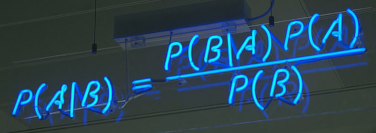

Vamos a reformularlo para adaptarlo a un problema de clasificación:
$$
\fbox{$p(y=k|{\bf x}) = \frac{p(y = k) \cdot p({\bf x}|y = k)}{p({\bf x})}$}
$$

- $p(y = k) ~\rightarrow~$ Probabilidad **a priori** de una clase:
> _Cómo de probable es una etiqueta, sin ver los datos._

- $p({\bf x}|y = k)~\rightarrow~$ Modelo de **verosimilitud** de los ejemplos de una clase
> _Cuál es la distribución de los ejemplos de una misma clase._

- $p(y=k|{\bf x})~\rightarrow~$ Probabilidad **a posteriori** de una clase después de ver los ejemplos
> _Cómo de probable es una etiqueta, pero ahora conociendo los datos._

- $p({\bf x})~\rightarrow~$ Probabilidad **marginal** de los ejemplos
> _Esta probabilidad **NO** la usaremos, en seguida comprenderemos por qué._

## Introduciendo el teorema de Bayes en el problema de maximización

$$
\begin{align}
  y^* &= \mathop{\arg\max}\limits_{y} p\big(y|{\bf x}\big)\\
  &= \mathop{\arg\max}\limits_{y} \frac{p(y = k) \cdot p({\bf x}|y = k)}{p({\bf x})} \\
  &= \mathop{\arg\max}\limits_{y} p(y = k) \cdot p({\bf x}|y = k)
\end{align}
$$

Puesto que buscamos la $y$, el denominador no tiene ningún efecto sobre la solución porque **sólo** depende de $\bf x$.

Por tanto, para solucionar el problema de clasificación, desde el punto de vista probabilístico, tenemos que crear dos modelos:
- El modelo a priori de la clase.
- El modelo de verosimilitud de los datos de cada clase.

PERO ANTES, conviene reformular el problema tomando logaritmos. <br>
> <small>El motivo es que las probabilidades son números menores que uno, y cuando hay multiplicaciones de números menores que uno el resultado es aún más pequeño. <br>
Esto provocaría, en la inmensa mayoría de casos, problemas de precisión. </small>

De esta manera tendríamos:
$$
\begin{align}
  y^* &= \mathop{\arg\max}\limits_{y} \log p\big(y|{\bf x}\big)\\
  &= \mathop{\arg\max}\limits_{y} \log \left(\frac{p(y = k) \cdot p({\bf x}|y = k)}{p({\bf x})}\right) \\
  &= \mathop{\arg\max}\limits_{y}\log  \big(  p(y = k) \cdot p({\bf x}|y = k)  \big)
\end{align}
$$
En definitiva,
$$ \fbox{$y^* = \mathop{\arg\max}\limits_{y} \big( \log p(y = k) + \log p({\bf x}|y = k)  \big)$}$$

# Modelo a priori de la clase

Consiste en estimar, o imponer, una probabilidad para cada una de las posibles clases que se pueden dar.

> En un problema de **clasificación binaria** habrá 2 clases, es decir $~y\in\{0,1\}$. <br>
Por tanto un posible modelo a priori **estimado** a partir del conjunto de entrenamiento sería una tabla como la siguiente:
<center>

| $y$ | $p(y)$ |
|---|:---:|
|y = 0 | $N_{y=0}/N$ |
|y = 1 | $N_{y=1}/N$ |
| Suma | $1$ |

</center>

> PERO también podríamos **imponer** unas probabilidades a priori nosotros.
<br>
<u> Ejemplo</u>:<br>
*Todas las probabilidades son igualmente probables "a priori"*:
$$ p(y=0) = p(y=1) = 0.5$$

Ya que estamos creando modelos probabilísticos, conviene aprender que la distribución de probabilidad de una variable aleatoria que solo puede tomar dos valores, como es el caso de $y \in \{0,1\}$ es la **Distribución Bernoulli**. <br>
En caso de que estimaramos esta distribución mediante el recuento de clases, sería:

$$
\mathrm{Ber}(y) = \left\lbrace
\begin{array}{lll}
\frac{N_{y=0}}{N} & \text{para} & y=0\\
\frac{N_{y=1}}{N} & \text{para} & y=1
\end{array}
\right.
$$

que habitualmente se expresa de este otro modo más compacto:

$$
\mathrm{Ber}(y) =
\left(\frac{N_{y=0}}{N}\right)^{1-y}  
\left(\frac{N_{y=1}}{N}\right)^{y}
$$

**Clasificación multi-clase**

En el caso de que haya más de una clase, tenemos que estimar o imponer la probabilidad de cada etiqueta posible.

La distribución de probabilidad en este caso se llama **Distribución Categórica**, y en caso de que la estimaramos mediante recuento su expresión, para $K$ clases diferentes sería:
$$
\mathrm{Cat}(y) = \left\lbrace
\begin{array}{lll}
\frac{N_{y=k}}{N} & \text{para} & y=k\\
\end{array}
\right\rbrace_{k=0,1,2,\ldots, K}
$$


# Modelos de verosimilitud

El modelo de verosimilitud es mucho más difícil ya que se trata de estimar la distribución de los ejemplos.

>Estimar la distribución de una única variable aleatoria ya es difícil. <br>
 PERO los ejemplos tienen $D$ dimensiones. <br>
 ¡¡ El modelo de verosimilitud consiste en estimar la **distribución conjunta** de $D$ variables al mismo tiempo !!

 Para "aliviar" esta dificultad se pueden hacer varias suposiciones, que da lugar a modelos más sencillos y a otros más complejos.

En los siguientes cuadernos estudiaremos los modelos de verosimilitud que dan lugar a :
- Naive Bayes
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Mezcla de gaussianas

# Ejemplo

Vamos a ver el ejemplo clásico que se utilizar para explicar el funcionamiento del Teorema de Bayes desde el punto de vista del ML.

> - Sabemos que la probabilidad de padecer **cáncer de mama** es del 15%<br>
<small>(_Podemos asumir que nos hemos restringido a mujeres menores de 60 años por ejemplo._)</small><br>
Por tanto, sin haber hecho ninguna prueba a nadie, podemos imponer una probabilidad _a priori_ $~p(y=1) = 0.15~$.<br>
Evidentemente, la probabilidad _a priori_ de NO padecer cancer es $~p(y=0) = 0.85$
- Tenemos un test experimental que da positivo 80 de cada 100 veces que se ha probado en mujeres a las que se les detectó un tumor de mama por otros medios. <br>
Por tanto sabemos que
$~p(x=1|y=1) = 0.8~$, y evidentemente también sabemos que $~p(x=0|y=1) = 0.2~$<br>
Este mismo test, en mujeres sanas, se equivoca 15 de cada 100 veces; así que
$~p(x=1|y=0) = 0.15~$, y evidentemente también sabemos que $~p(x=0|y=0) = 0.85~$<br>
- Una mujer se hace un test y resulta positivo. Qué es más probable con estos datos: ¿que tenga cancer o que no?.


Modelo a priori. <br>
<small>_(Prevalencia del cáncer de mama_)</small>
  
  |   | $p(y)$|
  |---------|--------|
  | $y=0$ | $0.85$ |
  | $y=1$ | $0.15$ |

Modelo de verosimilitud <br>
<small>_(Probabilidad de que el test sea positivo o negativo cuando la mujer tiene o no cáncer_)</small>

  | $p(x|y)$ | $y=0$  | $y=1$ |
  |----------|--------|-------|
  | $x=0$ | $0.85$ | $0.20$ |
  | $x=1$ | $0.15$ | $0.80$ |

Para elegir la **etiqueta a posteriori** tenemos que calcular:
- $ \log p(y=0) + \log p(x=1|y=0) $
- $ \log p(y=1) + \log p(x=1|y=0) $

In [ ]:
apriori = np.array([0.85, 0.15])
verosimilitud = np.array([[0.85, 0.20],[0.15, 0.80]])
x = 1 #<- resultado del test
aposteriori = [ np.log10(apriori[0]) + np.log10(verosimilitud[x,0]) ]
aposteriori.append(np.log10(apriori[1]) + np.log10(verosimilitud[x,1]))
aposteriori = np.array(aposteriori)
print(f'Cuando el test = {x}, la etiqueta más probable = {np.argmax(aposteriori)}.')

Cuando el test = 1, la etiqueta más probable = 0.


Es importante darse cuenta de que **NO** hemos calculado la probabilidad de tener cáncer sino la etiqueta más probable según sea el resultado del test y la prevalencia del cáncer.

> ¿Qué prevalencia debería tener el cáncer de mama para que la etiqueta sea "sí tiene cáncer" cuando el test resulta positivo?<br>
Prueba a modificar el modelo a priori para encontrar la respuesta.